Simple minded data anlysis of COVID19 data. Inspired by a Mathematica Notebook of Thomas Voigtmann

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn
seaborn.set()

In [2]:
import datapackage
import pandas

In [3]:
import urllib.request as request # only needed explicitly for Cloudflare hack below

In [4]:
data = pandas.read_csv("https://covid.ourworldindata.org/data/ecdc/new_cases.csv", 
                       index_col='date', parse_dates=True)
data

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-28,65432,172.0,10.0,135.0,3.0,1.0,0.0,0.0,223.0,59.0,...,4.0,14.0,17.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0
2020-04-29,72977,124.0,14.0,132.0,0.0,0.0,0.0,0.0,124.0,65.0,...,0.0,5.0,35.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2020-04-30,76380,122.0,16.0,199.0,0.0,0.0,0.0,0.0,158.0,0.0,...,7.0,5.0,63.0,1.0,2.0,0.0,0.0,5.0,2.0,2.0


Raw data for a few European countries

Text(0, 0.5, 'daily new reports')

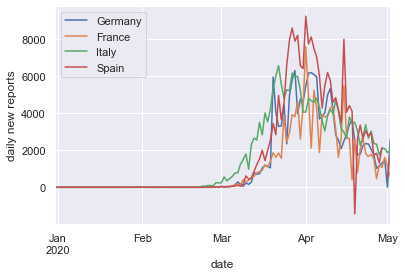

In [5]:
data[['Germany', 'France', 'Italy', 'Spain']].plot().set_ylabel("daily new reports")

Apply a 7 day moving average to smooth the curves

Text(0, 0.5, 'daily new reports (7-day rolling mean)')

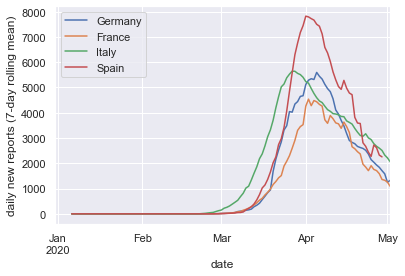

In [6]:
c = data.rolling(window=7).mean()
c[['Germany', 'France', 'Italy', 'Spain']].plot().set_ylabel("daily new reports (7-day rolling mean)")

Population by country

In [7]:
package = datapackage.Package('https://datahub.io/JohnSnowLabs/population-figures-by-country/datapackage.json')
#for i in range(len(package.resources)):
#   print(package.resource_names[i], package.resources[i].tabular)
# Spoof user agent to trick Cloudflare. Otherwise it blocks the download. Datahub should fix it
req = request.Request(package.resources[4].descriptor['path'], headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'})
population = pandas.read_csv(request.urlopen(req), index_col='Country')['Year_2016']
#population = pandas.read_csv(package.resources[4].descriptor['path'])
population

Country
Aruba             104822.0
Afghanistan     34656032.0
Angola          28813463.0
Albania          2876101.0
Andorra            77281.0
                   ...    
Kosovo           1816200.0
Yemen, Rep.     27584213.0
South Africa    55908865.0
Zambia          16591390.0
Zimbabwe        16150362.0
Name: Year_2016, Length: 263, dtype: float64

Unfortunately, these have different names in the population data base

In [8]:
missing = set(data.columns.values) - set(population.index)
len(missing)

34

Fix the easy ones

In [9]:
mapping = dict()
for country in missing:
    res = population.index.str.contains(country)
    if res.any():
        mapping[population[res].index.values[0]] = country
population.rename(index=mapping, inplace=True)
len(set(data.columns.values) - set(population.index))

22

In [10]:
print(population.index.values[population.index.str.contains('Congo,')])
print(data.columns.values[data.columns.str.contains(' Congo')])
print(population.index.values[population.index.str.contains('Kyr')])
print(data.columns.values[data.columns.str.contains('Kyr')])
print(population.index.values[population.index.str.contains('Lao')])
print(data.columns.values[data.columns.str.contains('Lao')])
print(population.index.values[population.index.str.contains('Slova')])
print(data.columns.values[data.columns.str.contains('Slova')])
print(population.index.values[population.index.str.contains('Korea, Rep')])
print(data.columns.values[data.columns.str.contains('Korea')])
mapping = {'Congo, Rep.': 'Democratic Republic of Congo', 
           'Kyrgyz Republic': 'Kyrgyzstan', 
           'Lao PDR': 'Laos', 
           'Slovak Republic': 'Slovakia', 
           'Korea, Rep.': 'South Korea'}
population.rename(index=mapping, inplace=True)

['Congo, Rep.']
['Democratic Republic of Congo']
['Kyrgyz Republic']
['Kyrgyzstan']
['Lao PDR']
['Laos']
['Slovak Republic']
['Slovakia']
['Korea, Rep.']
['South Korea']


Confirmed cases per population

(18322.0, 18384.0)

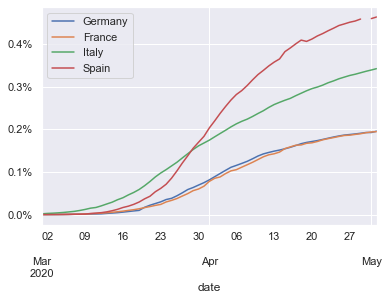

In [11]:
confirmed = data.cumsum()
ax = (confirmed / population)[['Germany', 'France', 'Italy', 'Spain']].plot()
ax.yaxis.set_major_formatter(PercentFormatter(1.0, 1))
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])

(18322.0, 18384.0)

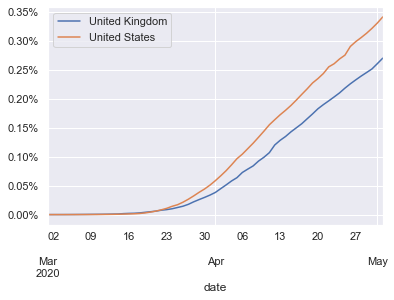

In [12]:
confirmed = data.cumsum()
ax = (confirmed / population)[['United Kingdom', 'United States']].plot()
ax.yaxis.set_major_formatter(PercentFormatter(1.0, 2))
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])

Naive estimate of active cases assuming everybody is sick for exactly 2 weeks

(18322.0, 18384.0)

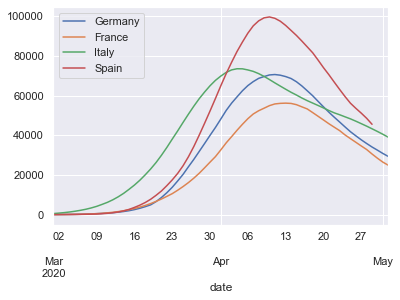

In [13]:
ax = (confirmed - confirmed.shift(14))[['Germany', 'France', 'Italy', 'Spain']].rolling(window=7).mean().plot()
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])

(18322.0, 18384.0)

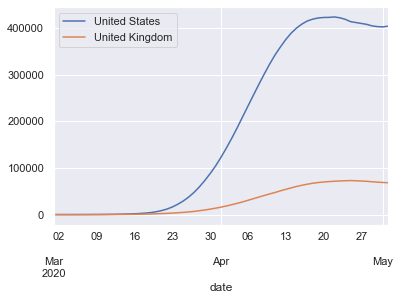

In [14]:
ax = (confirmed - confirmed.shift(14))[['United States', 'United Kingdom']].rolling(window=7).mean().plot()
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])

Active cases per population

(18322.0, 18384.0)

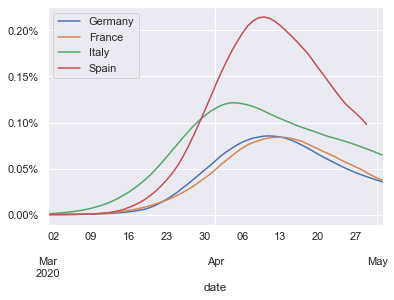

In [15]:
ax = ((confirmed - confirmed.shift(14)) / population)[['Germany', 'France', 'Italy', 'Spain']].rolling(window=7).mean().plot()
ax.yaxis.set_major_formatter(PercentFormatter(1.0, 2))
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])

(18322.0, 18384.0)

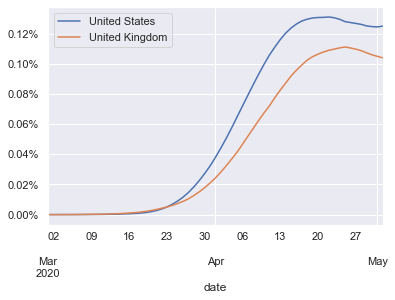

In [16]:
ax = ((confirmed - confirmed.shift(14)) / population)[['United States', 'United Kingdom']].rolling(window=7).mean().plot()
ax.yaxis.set_major_formatter(PercentFormatter(1.0, 2))
ax.set_xlim(pandas.to_datetime("1 March 2020"), confirmed.index[-1])

Use $R(t)\approx c(t)/c(t - 6)$. From https://www.medrxiv.org/content/10.1101/2020.04.22.20076430v1.full.pdf

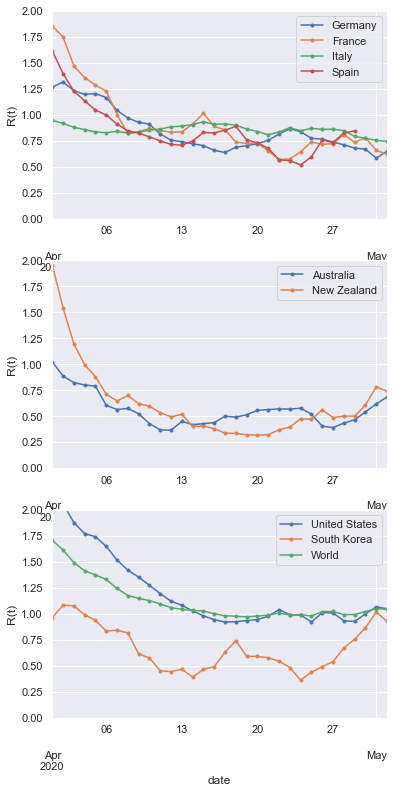

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(6, 13))
R = c / c.shift(6)
R[['Germany', 'France', 'Italy', 'Spain']].plot(ax=axs[0], style='.-')
R[['Australia', 'New Zealand']].plot(ax=axs[1], style='.-')
R[['United States', 'South Korea', 'World']].plot(ax=axs[2], style='.-')
for ax in axs:
    ax.set_xlim(pandas.to_datetime(("1 April 2020", 'today')))
    ax.set_ylim(0, 2)
    ax.set_ylabel("R(t)")

German events and german events delayed by 12 days

In [18]:
events = {'Germany': ["2020 Mar 8", "2020 Mar 13", "2020 Mar 22"],
         'France': ["2020 Mar 13", "2020 Mar 16"],
         'Italy': ["2020 Feb 22", "2020 Mar 4", "2020 Mar 11"],
         'Spain': ["2020 Mar 14", "2020 Mar 29"]}

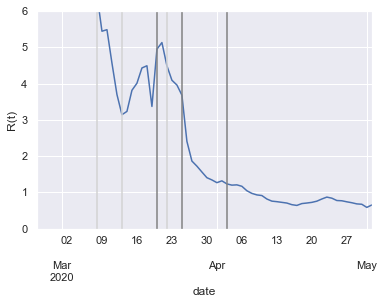

In [19]:
ax = R['Germany'].plot(xlim=pandas.to_datetime(("25 Feb 2020", 'today')), ylim=(0, 6))
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events['Germany']):
    ax.axvline(ev, c='lightgrey')
    ax.axvline(ev + pandas.Timedelta("12 days"), c='grey')

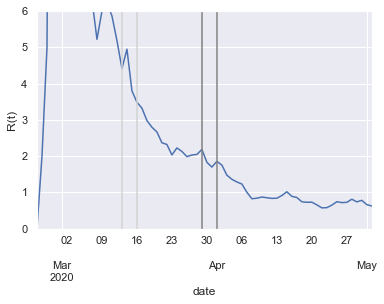

In [30]:
ax = R['France'].plot(xlim=pandas.to_datetime(("25 Feb 2020", 'today')), ylim=(0, 6))
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events['France']):
    ax.axvline(ev, c='lightgrey')
    ax.axvline(ev + pandas.Timedelta("16 days"), c='grey')

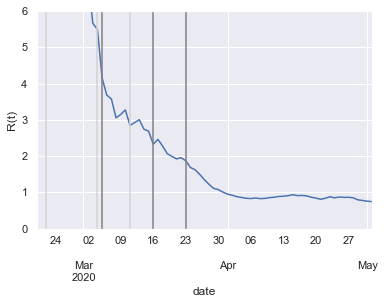

In [33]:
ax = R['Italy'].plot(xlim=pandas.to_datetime(("20 Feb 2020", 'today')), ylim=(0, 6))
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events['Italy']):
    ax.axvline(ev, c='lightgrey')
    ax.axvline(ev + pandas.Timedelta("12 days"), c='grey')

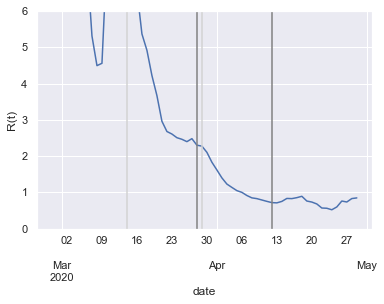

In [40]:
ax = R['Spain'].plot(xlim=pandas.to_datetime(("25 Feb 2020", 'today')), ylim=(0, 6))
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events['Spain']):
    ax.axvline(ev, c='lightgrey')
    ax.axvline(ev + pandas.Timedelta("14 days"), c='grey')

Countries with a mean R below 0.8. The only country below 0.3 is South Sudan which is very unlikely to be true

In [20]:
highlight = set(['Germany', 'France', 'World', 'Japan', 'Spain', 'Venezuela',
              'United States', 'United Kingdom', 'Turkey', 'Russia', 'China', 'Taiwan'])

[None, None]

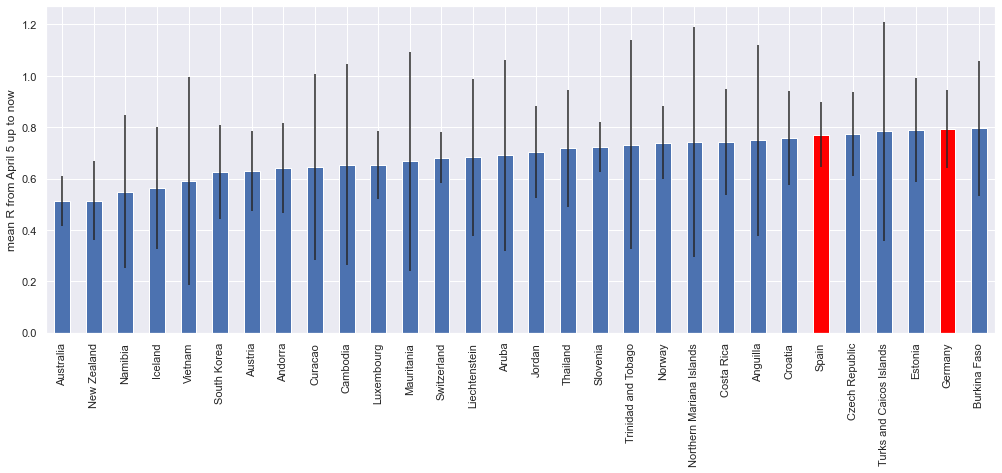

In [21]:
pandas.set_option('use_inf_as_na', True)
Rrecent = R[pandas.to_datetime("2020 April 5"):]
Rmean = Rrecent[Rrecent > 0.3].mean().dropna()
Rerr =  Rrecent.std().dropna()

low = Rmean[(Rmean <= 0.8) & (Rerr < 0.5)].sort_values()
ax = low.plot.bar(yerr=Rerr, figsize=(17, 6))
ax.set_ylabel("mean R from April 5 up to now")
[ax.patches[low.index.get_loc(emph)].set_facecolor('red') for emph in (highlight & set(low.index.values))]

Countrys with a mean R around 1

[None, None, None, None, None, None, None]

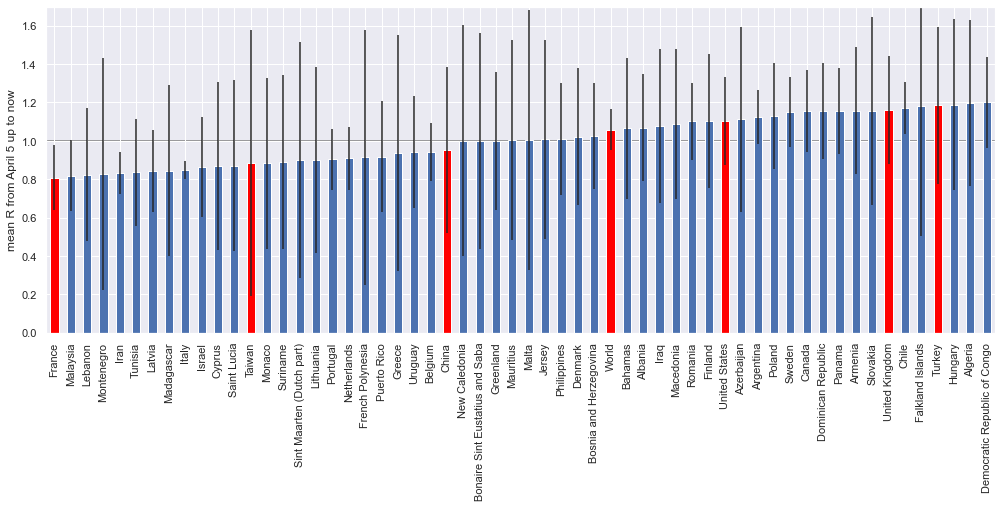

In [22]:
middle = Rmean[(Rmean > 0.8) & (Rmean <= 1.2) & (Rerr < 0.7)].sort_values()
ax = middle.plot.bar(yerr=Rerr, figsize=(17, 6), ylim=(0,1.7))
ax.set_ylabel("mean R from April 5 up to now")
ax.axhline(1, c='grey', zorder=0)
[ax.patches[middle.index.get_loc(emph)].set_facecolor('red') for emph in (highlight & set(middle.index.values))]

Countrys with a higher mean R but still below 2

[None, None]

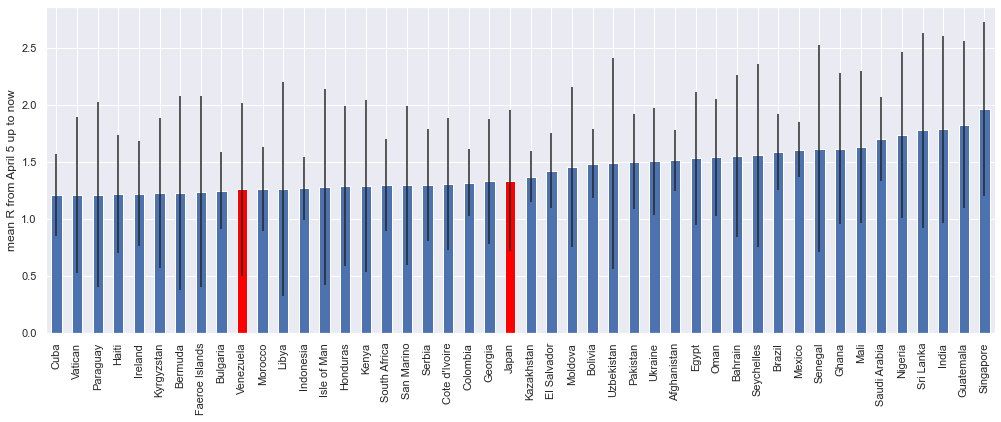

In [23]:
higher = Rmean[(Rmean > 1.2) & (Rmean <= 2) & (Rerr < 1)].sort_values()
ax = higher.plot.bar(yerr=Rerr, figsize=(17, 6))
ax.set_ylabel("mean R from April 5 up to now")
[ax.patches[higher.index.get_loc(emph)].set_facecolor('red') for emph in (highlight & set(higher.index.values))]

Pretty miserable countries with a R above 2

[None]

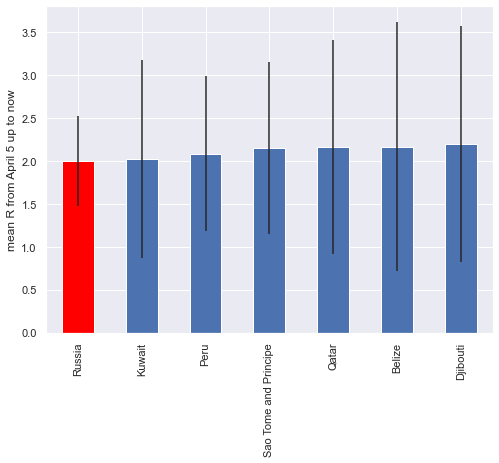

In [24]:
high = Rmean[(Rmean > 2) & (Rerr < 1.5)].sort_values()
ax = high.plot.bar(yerr=Rerr, figsize=(8, 6))
ax.set_ylabel("mean R from April 5 up to now")
[ax.patches[high.index.get_loc(emph)].set_facecolor('red') for emph in (highlight & set(high.index.values))]